# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_temp.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:1945: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    "barbados",
    "belize",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    "dominican_republic",
    
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    "uruguay"
]

In [3]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = ["brazil", "mexico"]#, "brazil", "mexico"]#regions
)


2022-12-28 20:23:22,572 - INFO - Successfully initialized SISEPUEDEFileStructure.
2022-12-28 20:23:22,573 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2022-12-28 20:23:22,573 - INFO - 	Setting export engine to 'sqlite'.
2022-12-28 20:23:22,592 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2022-12-28 20:23:22,593 - INFO - Successfully instantiated table ANALYSIS_METADATA
2022-12-28 20:23:22,597 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2022-12-28 20:23:22,598 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2022-12-28 20:23:22,602 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2022-12-28 20:23:22,603 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2022-12-28 20:23:22,607 - WARNING - No index

###  Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [4]:
sisepuede.get_primary_keys(dict_filt)

sisepuede.odpt_primary.get_indexing_dataframe(
					key_values = dict_filt,
					keys_return = [sisepuede.odpt_primary.key_primary]
				)

NameError: name 'dict_filt' is not defined

In [7]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": [0, 3001]
}
dict_filt = {
    "future_id": [1],
    "design_id": [0], 
    "strategy_id": [0, 3001]
}
dict_primary_keys_out = sisepuede.project_scenarios(
    dict_filt,
    chunk_size = 2
)

2022-12-28 21:50:44,650 - INFO - Running AFOLU model
2022-12-28 21:50:45,056 - INFO - AFOLU model run successfully completed
2022-12-28 21:50:45,056 - INFO - Running CircularEconomy model
2022-12-28 21:50:45,197 - INFO - CircularEconomy model run successfully completed
2022-12-28 21:50:45,198 - INFO - Running IPPU model
2022-12-28 21:50:45,382 - INFO - IPPU model run successfully completed
2022-12-28 21:50:45,383 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-28 21:50:45,521 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-28 21:50:45,668 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-28 21:50:45,669 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2022-28-Dec 21:50:47.679 Started modeling scenario.
2022-28-Dec 21:50:47.682 Validated run-time arguments.
2022-28-Dec 21:50:47.687 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-28-Dec 21:50:47.745 Dropped pre-existing result tables from database.
2022-28-Dec 21:50:47.747 Verified that transmission modeling is not enabled.
2022-28-Dec 21:50:47.868 Created parameter views and indices.
2022-28-Dec 21:50:47.872 Created temporary tables.
2022-28-Dec 21:50:51.445 Executed core database queries.
2022-28-Dec 21:50:51.449 Defined dimensions.
2022-28-Dec 21:50:51.461 Defined demand variables.
2022-28-Dec 21:50:51.469 Defined storage variables.
2022-28-Dec 21:50:51.470 Defined capacity variables.
2022-28-Dec 21:50:52.586 Defined activity variables.
2022-28-Dec 21:50:52.589 Defined costing variables.
2022-28-Dec 21:50:52.590 Defined reserve margin variables.
2022-28-Dec 21:50:52.614 Defined emissi

2022-12-28 21:51:02,190 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-28 21:51:02,213 - INFO - ElectricEnergy model run successfully completed
2022-12-28 21:51:02,332 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-28 21:51:02,334 - INFO - Model run for primary_id = 1 successfully completed in 17.68 seconds.
2022-12-28 21:51:02,340 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-28 21:51:02,677 - INFO - AFOLU model run successfully completed
2022-12-28 21:51:02,679 - INFO - Running CircularEconomy model
2022-12-28 21:51:02,798 - INFO - CircularEconomy model run successfully completed
2022-12-28 21:51:02,798 - INFO - Running IPPU model
2022-12-28 21:51:02,938 - INFO - IPPU model run successfully completed
2022-12-28 21:51:02,939 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-28 21:51:03,008 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-28 21:51:03,121 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-28 21:51:03,122 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2022-28-Dec 21:51:05.422 Started modeling scenario.
2022-28-Dec 21:51:05.423 Validated run-time arguments.
2022-28-Dec 21:51:05.426 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-28-Dec 21:51:05.437 Dropped pre-existing result tables from database.
2022-28-Dec 21:51:05.438 Verified that transmission modeling is not enabled.
2022-28-Dec 21:51:05.518 Created parameter views and indices.
2022-28-Dec 21:51:05.523 Created temporary tables.
2022-28-Dec 21:51:08.216 Executed core database queries.
2022-28-Dec 21:51:08.218 Defined dimensions.
2022-28-Dec 21:51:08.227 Defined demand variables.
2022-28-Dec 21:51:08.232 Defined storage variables.
2022-28-Dec 21:51:08.233 Defined capacity variables.
2022-28-Dec 21:51:09.541 Defined activity variables.
2022-28-Dec 21:51:09.545 Defined costing variables.
2022-28-Dec 21:51:09.546 Defined reserve margin variables.
2022-28-Dec 21:51:09.571 Defined emissi

2022-12-28 21:51:19,751 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-28 21:51:19,778 - INFO - ElectricEnergy model run successfully completed
2022-12-28 21:51:19,933 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-28 21:51:19,936 - INFO - Model run for primary_id = 5006 successfully completed in 17.6 seconds.



	Running Energy (Fugitive Emissions)


2022-12-28 21:51:20,421 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-28 21:51:20,859 - INFO - Running AFOLU model
2022-12-28 21:51:21,342 - INFO - AFOLU model run successfully completed
2022-12-28 21:51:21,343 - INFO - Running CircularEconomy model
2022-12-28 21:51:21,498 - INFO - CircularEconomy model run successfully completed
2022-12-28 21:51:21,499 - INFO - Running IPPU model
2022-12-28 21:51:21,690 - INFO - IPPU model run successfully completed
2022-12-28 21:51:21,691 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-28 21:51:21,788 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-28 21:51:21,938 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-28 21:51:21,938 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2022-28-Dec 21:51:23.432 Started modeling scenario.
2022-28-Dec 21:51:23.432 Validated run-time arguments.
2022-28-Dec 21:51:23.436 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-28-Dec 21:51:23.447 Dropped pre-existing result tables from database.
2022-28-Dec 21:51:23.448 Verified that transmission modeling is not enabled.
2022-28-Dec 21:51:23.524 Created parameter views and indices.
2022-28-Dec 21:51:23.529 Created temporary tables.
2022-28-Dec 21:51:25.335 Executed core database queries.
2022-28-Dec 21:51:25.337 Defined dimensions.
2022-28-Dec 21:51:25.347 Defined demand variables.
2022-28-Dec 21:51:25.353 Defined storage variables.
2022-28-Dec 21:51:25.354 Defined capacity variables.
2022-28-Dec 21:51:26.531 Defined activity variables.
2022-28-Dec 21:51:26.535 Defined costing variables.
2022-28-Dec 21:51:26.536 Defined reserve margin variables.
2022-28-Dec 21:51:26.563 Defined emissi

2022-12-28 21:51:36,194 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-28 21:51:36,215 - INFO - ElectricEnergy model run successfully completed
2022-12-28 21:51:36,346 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-28 21:51:36,350 - INFO - Model run for primary_id = 1 successfully completed in 15.49 seconds.
2022-12-28 21:51:36,357 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-28 21:51:36,764 - INFO - AFOLU model run successfully completed
2022-12-28 21:51:36,767 - INFO - Running CircularEconomy model
2022-12-28 21:51:36,907 - INFO - CircularEconomy model run successfully completed
2022-12-28 21:51:36,908 - INFO - Running IPPU model
2022-12-28 21:51:37,084 - INFO - IPPU model run successfully completed
2022-12-28 21:51:37,085 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-28 21:51:37,173 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-28 21:51:37,316 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-28 21:51:37,317 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2022-28-Dec 21:51:38.817 Started modeling scenario.
2022-28-Dec 21:51:38.818 Validated run-time arguments.
2022-28-Dec 21:51:38.821 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-28-Dec 21:51:38.831 Dropped pre-existing result tables from database.
2022-28-Dec 21:51:38.831 Verified that transmission modeling is not enabled.
2022-28-Dec 21:51:38.904 Created parameter views and indices.
2022-28-Dec 21:51:38.910 Created temporary tables.
2022-28-Dec 21:51:40.829 Executed core database queries.
2022-28-Dec 21:51:40.831 Defined dimensions.
2022-28-Dec 21:51:40.840 Defined demand variables.
2022-28-Dec 21:51:40.846 Defined storage variables.
2022-28-Dec 21:51:40.847 Defined capacity variables.
2022-28-Dec 21:51:41.954 Defined activity variables.
2022-28-Dec 21:51:41.958 Defined costing variables.
2022-28-Dec 21:51:41.958 Defined reserve margin variables.
2022-28-Dec 21:51:41.985 Defined emissi

2022-12-28 21:51:51,773 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-28 21:51:51,795 - INFO - ElectricEnergy model run successfully completed
2022-12-28 21:51:51,921 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-28 21:51:51,924 - INFO - Model run for primary_id = 5006 successfully completed in 15.57 seconds.



	Running Energy (Fugitive Emissions)


2022-12-28 21:51:52,393 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-28 21:51:52,440 - INFO - Table ATTRIBUTE_PRIMARY successfully appended to database.


In [5]:
df_out = sisepuede.read_output(None)

In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [39]:
#available_indices
idt.index_conflict_resolution


'write_skip'

In [8]:
sisepuede.database.read_table(sisepuede.database.table_name_attribute_primary)

,primary_id,design_id,strategy_id,future_id
0,0,0,0,0
1,5005,0,3001,0
2,1,0,0,1
3,5006,0,3001,1


In [15]:
vars_extract = []

sector = "Energy"
subsectors = sisepuede.model_attributes.get_sector_subsectors(sector)

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)

In [25]:
[x for x in df_out.columns if "energy_demand_enfu_subsector_total_pj_trns" in x]

['energy_demand_enfu_subsector_total_pj_trns_fuel_biofuels',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_biogas',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_biomass',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_coal',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_coke',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_diesel',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_electricity',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_gas_furnace',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_gas_petroleum_liquid',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_gasoline',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_geothermal',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_hydrogen',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_hydropower',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_kerosene',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_natural_gas',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_nuclear',
 'energy_dema

In [26]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,brazil,11.254154
71,5005,brazil,11.254154
107,0,mexico,7.277682
143,5005,mexico,7.277682
179,0,barbados,0.013750
215,5005,barbados,0.013750


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [5]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
71,1,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
107,2,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
143,1001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
179,2001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
215,3001,35,0.5,0.0,0.5,1.00,0.00,0.00,0.0,1.0,...,0.00,0.000,0.00,1.000,0.000,0.000,0.49,0.5,0.0,0.01
251,4001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
287,5001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02


In [36]:
su.ordered_trajectory_arrays[("frac_trns_fuelmix_public_electricity", None)].get("id_coordinates")

,strategy_id
0,0
2,1
3,2
4,1001
5,2001
1,3001
6,4001
7,5001


In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

<AxesSubplot: xlabel='time_period'>

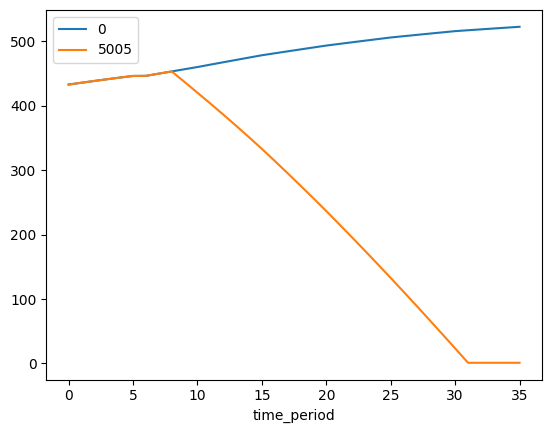

In [7]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "brazil"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [24]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [21]:
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")

In [392]:
import ordered_direct_product_table as odpt
importlib.reload(odpt)  
            
    
    

vit = odpt.OrderedDirectProductTable(
    {"strategy_id": list(range(100)), "future_id": list(range(1000)), "design_id": [0, 1, 2, 3], "time_series_id": [0, 1, 2]},
    ["design_id", "time_series_id", "strategy_id", "future_id"],
    key_primary = "primary_id"
)


In [399]:
vit.get_dims_from_key(596, return_type = "dict")

{'design_id': 0, 'time_series_id': 0, 'strategy_id': 0, 'future_id': 596}

In [376]:
import time
t0 = time.time()

df1 = vit.get_indexing_dataframe(key_values = {"future_id": list(range(4000)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])

sf.get_time_elapsed(t0, n_digits = 5)

1.41068

In [401]:
vit.get_indexing_dataframe(key_values = {"future_id": list(range(5)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])




['primary_id']


,primary_id
0,0
1,1
2,2
3,3
4,4
...,...
175,1199000
176,1199001
177,1199002
178,1199003


In [332]:
#vit.get_indexing_dataframe(key_values = rands)
vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})

99871672

In [346]:
#vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})





get_dims_from_key(99871672, return_type = "dict")

{'design_id': 3, 'time_series_id': 0, 'strategy_id': 98, 'future_id': 71672}

In [338]:
99871672%30000000

9871672

In [330]:
#rands = np.random.choice(range(10**8), 3000, replace = False);
60/15
0%1

0

In [ ]:
#
# idea: 
#    0. generate output table of proper shape
#    1. generate dimensional vector
#    2. take subset of that vector
#    3. add to output table
#

In [262]:
vit.cardinality_ordered_reversed
vit.cumulative_dimensional_products_reversed
vit.get_key_value(**{"design_id": 3, "strategy_id": 1, "future_id": 0})



0
1
0
3


6400000

In [47]:
key = "this"
def func(**kwargs):
    for k in kwargs.keys():
        val = kwargs.get(k)
        print(f"{k}:\t{val}")
        
func(**{"strategy_id": 0, "primary_id": 2})

strategy_id:	0
primary_id:	2


In [25]:
importlib.reload(sa)
importlib.reload(me)

model_energy = me.NonElectricEnergy(sa.model_attributes)
model_afolu = mafl.AFOLU(sa.model_attributes)
model_ippu = mi.IPPU(sa.model_attributes)
model_ce = mce.CircularEconomy(sa.model_attributes)


df_ins = df_input.copy()

# afolu
df_out_afolu = model_afolu.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_afolu,
    model_ce.integration_variables + model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# circular economy
df_out_ce = model_ce.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_ce,
    model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# ippu
if False:
    df_out_ippu = model_ippu.project(df_ins)
    df_ins = sa.model_attributes.transfer_df_variables(
        df_ins,
        df_out_ippu,
        model_energy.integration_variables_non_fgtv
    )

    df_out_energy = model_energy.project(df_ins)



In [39]:
[sa.model_attributes.build_varlist("Solid Waste", x) for x in model_ce.integration_variables]



[[], [], [], [], []]

In [95]:
#sa.model_attributes.get_subsector_variables("Carbon Capture and Sequestration")
subsec = "ccsq"

for subsec in ["ccsq", "scoe", "trns", "inen"]:
    check1 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if f"energy_demand_enfu_subsector_total_pj_{subsec}" in x]
    ].sum(axis = 1))

    check2 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
    ].sum(axis = 1))
    
    check3 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" in x)]
    ].sum(axis = 1))
    
    print(f"subsec {subsec}:")
    print(check1 - check2)
    print(check1 - check3)
    print("")

subsec ccsq:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

subsec scoe:
[ 0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00 -2.27373675e-13 -2.27373675e-13  0.00000000e+00
 -2.27373675e-13  0.00000000e+00  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[-2.27373675e-13 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0

In [63]:
print(subsec)
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
].sum(axis = 1)

df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
]
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
]

inen


,energy_demand_enfu_subsector_total_pj_inen_fuel_biofuels,energy_demand_enfu_subsector_total_pj_inen_fuel_biogas,energy_demand_enfu_subsector_total_pj_inen_fuel_biomass,energy_demand_enfu_subsector_total_pj_inen_fuel_coal,energy_demand_enfu_subsector_total_pj_inen_fuel_coke,energy_demand_enfu_subsector_total_pj_inen_fuel_diesel,energy_demand_enfu_subsector_total_pj_inen_fuel_electricity,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_furnace,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_petroleum_liquid,energy_demand_enfu_subsector_total_pj_inen_fuel_gasoline,...,energy_demand_enfu_subsector_total_pj_inen_fuel_hydropower,energy_demand_enfu_subsector_total_pj_inen_fuel_kerosene,energy_demand_enfu_subsector_total_pj_inen_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_inen_fuel_nuclear,energy_demand_enfu_subsector_total_pj_inen_fuel_ocean,energy_demand_enfu_subsector_total_pj_inen_fuel_oil,energy_demand_enfu_subsector_total_pj_inen_fuel_other,energy_demand_enfu_subsector_total_pj_inen_fuel_solar,energy_demand_enfu_subsector_total_pj_inen_fuel_waste,energy_demand_enfu_subsector_total_pj_inen_fuel_wind
0,0.0,0.0,2392.550271,1156.498987,977.969437,1.795398,5660.577095,264.509709,0.126464,0.241881,...,0.0,0.0,7676.644206,0.0,0.0,6992.150941,0.0,25.121778,0.0,0.0
1,0.0,0.0,2390.047010,1155.288973,976.932265,1.802197,5654.652551,264.226550,0.126943,0.242797,...,0.0,0.0,7668.603903,0.0,0.0,6984.826270,0.0,25.095494,0.0,0.0
2,0.0,0.0,2387.535988,1154.075208,975.892071,1.801933,5648.705836,263.942613,0.126925,0.242762,...,0.0,0.0,7660.538798,0.0,0.0,6977.479001,0.0,25.069128,0.0,0.0
3,0.0,0.0,2385.017195,1152.857687,974.848951,1.807626,5642.744148,263.657947,0.127326,0.243529,...,0.0,0.0,7652.448915,0.0,0.0,6970.109206,0.0,25.042681,0.0,0.0
4,0.0,0.0,2382.490633,1151.636410,973.803042,1.810135,5636.762524,263.372617,0.127503,0.243867,...,0.0,0.0,7644.334349,0.0,0.0,6962.716958,0.0,25.016152,0.0,0.0
5,0.0,0.0,2379.956288,1150.411371,972.754439,1.848598,5630.782554,263.086672,0.130212,0.249049,...,0.0,0.0,7636.195115,0.0,0.0,6955.302400,0.0,24.989541,0.0,0.0
6,0.0,0.0,2389.686941,1155.114925,976.744397,1.888368,5653.827919,264.166795,0.133013,0.254407,...,0.0,0.0,7667.423370,0.0,0.0,6983.747337,0.0,25.091713,0.0,0.0
7,0.0,0.0,2399.293969,1159.758722,980.671442,1.929625,5676.575460,265.227176,0.135919,0.259965,...,0.0,0.0,7698.247286,0.0,0.0,7011.822795,0.0,25.192587,0.0,0.0
8,0.0,0.0,2408.786445,1164.347148,984.551620,1.972318,5699.052796,266.274868,0.138926,0.265717,...,0.0,0.0,7728.703626,0.0,0.0,7039.563453,0.0,25.292258,0.0,0.0
9,0.0,0.0,2418.167497,1168.881714,988.386211,2.016493,5721.267356,267.310219,0.142038,0.271668,...,0.0,0.0,7758.802431,0.0,0.0,7066.978456,0.0,25.390759,0.0,0.0


In [41]:
df_out_energy[
    [x for x in df_out_energy.columns if ("energy_demand_enfu_subsector_total_pj_trns" in x)]
    #[x for x in df_out_energy.columns if ("energy_consumption_trns" in x)]
].sum(axis = 1)


0     6016.964277
1     6056.086091
2     6094.577617
3     6132.070740
4     6168.067295
5     6202.197909
6     6204.582066
7     6252.307569
8     6299.961994
9     6347.547922
10    6395.067807
11    6446.476951
12    6497.533833
13    6548.256856
14    6598.663073
15    6648.768307
16    6691.130187
17    6733.213892
18    6775.031605
19    6816.594832
20    6857.914346
21    6893.262301
22    6928.338002
23    6963.152323
24    6997.715480
25    7032.037204
26    7059.925811
27    7087.556553
28    7114.938648
29    7142.080832
30    7168.991304
31    7188.227868
32    7207.222019
33    7225.981249
34    7244.512793
35    7262.823432
dtype: float64